# 444 Final Project



## Importing and Inspecting the Data

In [5]:
# prompt: Read in a dataset called student_depression_dataset.csv and inspect the first few rows.

import pandas as pd

# Load the dataset
try:
  df = pd.read_csv('student_depression_dataset.csv')
except FileNotFoundError:
  print("Error: 'student_depression_dataset.csv' not found. Please upload the file to your current working directory or provide the correct path.")
except Exception as e:
  print(f"An error occurred: {e}")
else:
  # Inspect the first few rows
  print(df.head())


   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy       BA   
3     

In [6]:
# How many records have each value of 'Work Pressure'
print(df['Work Pressure'].value_counts())

# Remove column, as it seems to be erroneously entered/ not consistently asked.
df = df.drop(columns=['Work Pressure'])

# Remove rows with ?
mask = df.applymap(lambda x: x == '?')
df = df[~mask.any(axis=1)]


Work Pressure
0.0    27898
5.0        2
2.0        1
Name: count, dtype: int64


<ipython-input-6-c3f23825ca88>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = df.applymap(lambda x: x == '?')


In [7]:
# Check for nulls
print(df.isnull().sum())
# Print number of records
print(len(df))
# Print the feature names
print(df.columns)
# Print the unique values of the categorical variables
# List of categorical columns
categorical_columns = ['Gender', 'City', 'Profession', 'Degree', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?']

# Print unique values for each categorical column
for column in categorical_columns:
    print(f"Unique values for {column}: {df[column].unique()}")

# Print the type of each variable
print(df.dtypes)


id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64
27898
Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours',

In [8]:
# Make the family history binary
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].apply(lambda x: 1 if x == 'Yes' else 0)
# Make the suicidal thoughts binary
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].apply(lambda x: 1 if x == 'Yes' else 0)

<ipython-input-8-ac7bf0a75f89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Family History of Mental Illness'] = df['Family History of Mental Illness'].apply(lambda x: 1 if x == 'Yes' else 0)
<ipython-input-8-ac7bf0a75f89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].apply(lambda x: 1 if x == 'Yes' else 0)


In [9]:
# Strip the double quotation marks from anything if they are there
df = df.apply(lambda x: x.str.strip("'") if x.dtype == "object" else x)

In [10]:
# Remove the incorrect city name records.
# Define the list of valid cities
valid_cities = ['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur', 'Pune',
                'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara', 'Kalyan', 'Rajkot',
                'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow', 'Indore', 'Surat', 'Ludhiana',
                'Bhopal', 'Meerut', 'Agra', 'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur',
                'Patna', 'Faridabad', 'Delhi']

# Filter the DataFrame to keep only rows with valid cities
df = df[df['City'].isin(valid_cities)]

# Check the shape after cleaning
print(f'Number of records after removing invalid cities: {df.shape[0]}')
for column in categorical_columns:
    print(f"Unique values for {column}: {df[column].unique()}")

Number of records after removing invalid cities: 27872
Unique values for Gender: ['Male' 'Female']
Unique values for City: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi']
Unique values for Profession: ['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
Unique values for Degree: ['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' 'Class 12' 'B.Ed' 'LLB' 'BE'
 'M.Ed' 'MSc' 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com'
 'B.Arch' 'LLM' 'B.Tech' 'BBA' 'ME' 'MHM' 'Others']
Unique values for Sleep Duration: ['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']
Unique values

## Linear Regression Model

### Setup the scaler and encoding


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Features (X) and target (y)
X = df_encoded.drop(columns=['Depression', 'id'])  # Drop 'Depression' as it's the target variable
y = df_encoded['Depression']  # Target variable
df_encoded.head()

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


In [13]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

# Metrics for Linear Regression

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 0.11766216311008404
R² Score: 0.5141125855905542


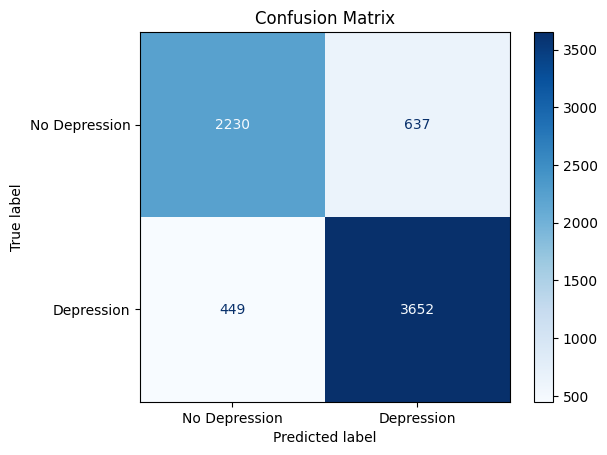

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Convert predicted probabilities to binary values (using a threshold of 0.5)
y_pred_binary = (y_pred > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Display the confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Depression", "Depression"])
cmd.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.8441446613088404
Precision: 0.8514805315924457
Recall: 0.8905145086564252
F1-Score: 0.8705601907032181


In [18]:
# Feature importance
# Get the feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,  # Assuming X is a DataFrame
    'Coefficient': model.coef_
})

# Sort by absolute value of coefficients to see which features matter most
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print(feature_importance)

                                    Feature   Coefficient  Abs_Coefficient
85  Have you ever had suicidal thoughts ?_1  1.833956e-01     1.833956e-01
1                         Academic Pressure  1.511880e-01     1.511880e-01
6                          Financial Stress  9.844691e-02     9.844691e-02
0                                       Age -7.121902e-02     7.121902e-02
84                 Dietary Habits_Unhealthy  6.360728e-02     6.360728e-02
..                                      ...           ...              ...
66                           Degree_M.Pharm -8.168228e-05     8.168228e-05
50                Profession_UX/UI Designer -9.442933e-06     9.442933e-06
46                       Profession_Manager  1.265438e-17     1.265438e-17
43        Profession_Educational Consultant  2.700172e-18     2.700172e-18
47                    Profession_Pharmacist  2.225288e-18     2.225288e-18

[86 rows x 3 columns]
